<a href="https://colab.research.google.com/github/stknkm/Mastery_Project_MS_TravelTide/blob/main/TravelTide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling and modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import timedelta, datetime

In [2]:
# Load and inspect dataset

df = pd.read_csv('TravelTide.csv')

# Basic dataset info
print(df.shape)
df.info()

(49211, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  49211 non-null  int64  
 1   trip_id                  16702 non-null  object 
 2   session_id               49211 non-null  object 
 3   session_start            49211 non-null  object 
 4   session_end              49211 non-null  object 
 5   flight_discount          49211 non-null  bool   
 6   hotel_discount           49211 non-null  bool   
 7   flight_discount_amount   8282 non-null   float64
 8   hotel_discount_amount    6205 non-null   float64
 9   flight_booked            49211 non-null  bool   
 10  hotel_booked             49211 non-null  bool   
 11  page_clicks              49211 non-null  int64  
 12  cancellation             49211 non-null  bool   
 13  origin_airport           14270 non-null  object 
 14  destinatio

# Data Cleaning & Type Conversion

* Convert data types and fill missing values

In [3]:
df['seats'] = pd.to_numeric(df['seats'], errors='coerce').fillna(0).astype(int)
df['flight_discount'] = df['flight_discount'].astype(int)
df['hotel_discount'] = df['hotel_discount'].astype(int)
df['flight_discount_amount'] = df['flight_discount_amount'].fillna(0)
df['hotel_discount_amount'] = df['hotel_discount_amount'].fillna(0)
df['flight_booked'] = df['flight_booked'].astype(int)
df['hotel_booked'] = df['hotel_booked'].astype(int)
df['cancellation'] = df['cancellation'].astype(int)
df['return_flight_booked'] = pd.to_numeric(df['return_flight_booked'], errors='coerce').fillna(0).astype(int)
df['checked_bags'] = pd.to_numeric(df['checked_bags'], errors='coerce').fillna(0).astype(int)
df['base_fare_usd'] = df['base_fare_usd'].fillna(0)
df['hotel_per_room_usd'] = df['hotel_per_room_usd'].fillna(0)
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce').fillna(0).astype(int)
df['married'] = df['married'].astype(int)
df['has_children'] = df['has_children'].astype(int)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  49211 non-null  int64  
 1   trip_id                  16702 non-null  object 
 2   session_id               49211 non-null  object 
 3   session_start            49211 non-null  object 
 4   session_end              49211 non-null  object 
 5   flight_discount          49211 non-null  int64  
 6   hotel_discount           49211 non-null  int64  
 7   flight_discount_amount   49211 non-null  float64
 8   hotel_discount_amount    49211 non-null  float64
 9   flight_booked            49211 non-null  int64  
 10  hotel_booked             49211 non-null  int64  
 11  page_clicks              49211 non-null  int64  
 12  cancellation             49211 non-null  int64  
 13  origin_airport           14270 non-null  object 
 14  destination           

In [5]:
df.describe()

,user_id,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation,seats,...,destination_airport_lat,destination_airport_lon,base_fare_usd,nights,rooms,hotel_per_room_usd,married,has_children,home_airport_lat,home_airport_lon
count,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,...,14270.000000,14270.000000,49211.000000,14726.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000,49211.000000
mean,545282.694946,0.180691,0.138485,0.023538,0.014146,0.290992,0.303164,17.588791,0.012396,0.352381,...,38.610024,-88.947203,152.498686,3.672484,0.357461,53.246347,0.441893,0.326614,38.427222,-94.183762
std,64640.047648,0.384766,0.345412,0.062635,0.043284,0.454224,0.459630,21.495987,0.110644,0.635283,...,6.949739,33.090373,501.104148,3.806717,0.611429,104.065294,0.496617,0.468979,6.185962,18.065868
min,23557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-37.008000,-157.927000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,21.316000,-157.927000
25%,517119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,33.942000,-112.383000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.818000,-112.383000
50%,540308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,...,39.872000,-87.752000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.103000,-90.035000
75%,573922.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,22.000000,0.000000,1.000000,...,42.409000,-75.241000,115.115000,5.000000,1.000000,83.000000,1.000000,1.000000,42.238000,-79.370000
max,844489.000000,1.000000,1.000000,0.600000,0.450000,1.000000,1.000000,566.000000,1.000000,8.000000,...,55.972000,174.792000,21548.040000,43.000000,4.000000,1376.000000,1.000000,1.000000,61.251000,-63.499000


* Convert and Fix Dates

In [6]:
# Convert date columns
date_columns = ['birthdate', 'sign_up_date', 'session_start','session_end',
                'departure_time', 'return_time', 'check_in_time','check_out_time']
df[date_columns] = df[date_columns].apply(pd.to_datetime,format='mixed',errors='coerce')

# If check-out time is earlier than or equal to check-in time (e.g., due to missing date part),
# assume the check-out is on the next day and add 1 day to correct it.
df.loc[df['check_out_time'] <= df['check_in_time'], 'check_out_time'] += timedelta(days=1)

# Create a new column 'nights_cleaned' based on the original 'nights' column.
# If nights were set to -1 or -2 (likely invalid), recalculate it from check-in and check-out difference.
# Replace any remaining values of -1 or 0 with a minimum of 1 night (if missing, set to 0).
df['nights_cleaned'] = df['nights']
df.loc[df['nights'].isin([-1, -2]), 'nights_cleaned'] = (df['check_out_time'] - df['check_in_time']).dt.days
df['nights_cleaned'] = df['nights_cleaned'].replace({-1: 0, 0: 1}).fillna(0).astype(int)

In [7]:
df['nights_cleaned'].value_counts()

,count
nights_cleaned,
0,34498
1,4527
2,2852
3,2004
4,1392
5,915
6,677
7,489
8,401


#  Feature Engineering

In [8]:
df['age'] = datetime.now().year - df['birthdate'].dt.year


df['session_duration'] = (df['session_end'] - df['session_start']).dt.total_seconds() / 60


df['trip_duration'] = (df['return_time'] - df['departure_time']).dt.days.fillna(0)


df['acount_age_days'] = (datetime.now() - df['sign_up_date']).dt.days

# Aggregate Data Per User

In [9]:


session_agg = df.groupby('user_id').agg(
    total_sessions=('session_id', 'nunique'),
    avg_session_duration=('session_duration', 'mean'),
    total_cancellation=('cancellation', 'sum'),
    avg_cancellation=('cancellation', 'mean'),
    avg_page_clicks=('page_clicks', 'mean'),
    acount_age_days=('acount_age_days', 'mean')
).reset_index()




flight_agg = df.groupby('user_id').agg(
    total_flights=('flight_booked', 'sum'),
    total_seats=('seats', 'sum'),
    avg_seats=('seats', 'mean'),
    total_checked_bags=('checked_bags', 'sum'),
    avg_checked_bags=('checked_bags', 'mean'),
    total_flight_discount=('flight_discount_amount', 'sum'),
    avg_flight_discount=('flight_discount_amount', 'mean'),
    avg_base_fare=('base_fare_usd', 'mean'),
    avg_return_flights=('return_flight_booked', 'mean'),
    avg_trip_duration=('trip_duration', 'mean'),

).reset_index()




hotel_agg = df.groupby('user_id').agg(
    total_hotels=('hotel_booked', 'sum'),
    total_nights=('nights_cleaned', 'sum'),
    avg_rooms=('rooms', 'mean'),
    avg_hotel_room_cost=('hotel_per_room_usd', 'mean'),
    total_hotel_discount=('hotel_discount_amount', 'sum'),
    avg_hotel_discount=('hotel_discount_amount', 'mean'),

).reset_index()


#  Merge and Create Final DataFrame

merged_df = session_agg.merge(flight_agg, on='user_id', how='left')
merged_df = merged_df.merge(hotel_agg, on='user_id', how='left')


final_df = merged_df.merge(
    df[['user_id', 'gender', 'age', 'married', 'has_children']].drop_duplicates(),
    on='user_id',
    how='left'
)



In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5998 non-null   int64  
 1   total_sessions         5998 non-null   int64  
 2   avg_session_duration   5998 non-null   float64
 3   total_cancellation     5998 non-null   int64  
 4   avg_cancellation       5998 non-null   float64
 5   avg_page_clicks        5998 non-null   float64
 6   acount_age_days        5998 non-null   float64
 7   total_flights          5998 non-null   int64  
 8   total_seats            5998 non-null   int64  
 9   avg_seats              5998 non-null   float64
 10  total_checked_bags     5998 non-null   int64  
 11  avg_checked_bags       5998 non-null   float64
 12  total_flight_discount  5998 non-null   float64
 13  avg_flight_discount    5998 non-null   float64
 14  avg_base_fare          5998 non-null   float64
 15  avg_

* Encode gender

In [11]:
final_df['gender'].value_counts()

,count
gender,
F,5292
M,695
O,11


In [12]:
replace_values = {'F' : True, 'O' : True, 'M' : False }
final_df['gender'] = final_df['gender'].map(replace_values)

In [13]:
final_df['gender'].value_counts()

,count
gender,
True,5303
False,695


In [14]:
final_df['gender']= final_df['gender'].astype(int)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5998 non-null   int64  
 1   total_sessions         5998 non-null   int64  
 2   avg_session_duration   5998 non-null   float64
 3   total_cancellation     5998 non-null   int64  
 4   avg_cancellation       5998 non-null   float64
 5   avg_page_clicks        5998 non-null   float64
 6   acount_age_days        5998 non-null   float64
 7   total_flights          5998 non-null   int64  
 8   total_seats            5998 non-null   int64  
 9   avg_seats              5998 non-null   float64
 10  total_checked_bags     5998 non-null   int64  
 11  avg_checked_bags       5998 non-null   float64
 12  total_flight_discount  5998 non-null   float64
 13  avg_flight_discount    5998 non-null   float64
 14  avg_base_fare          5998 non-null   float64
 15  avg_

# Identifying and handling outliers

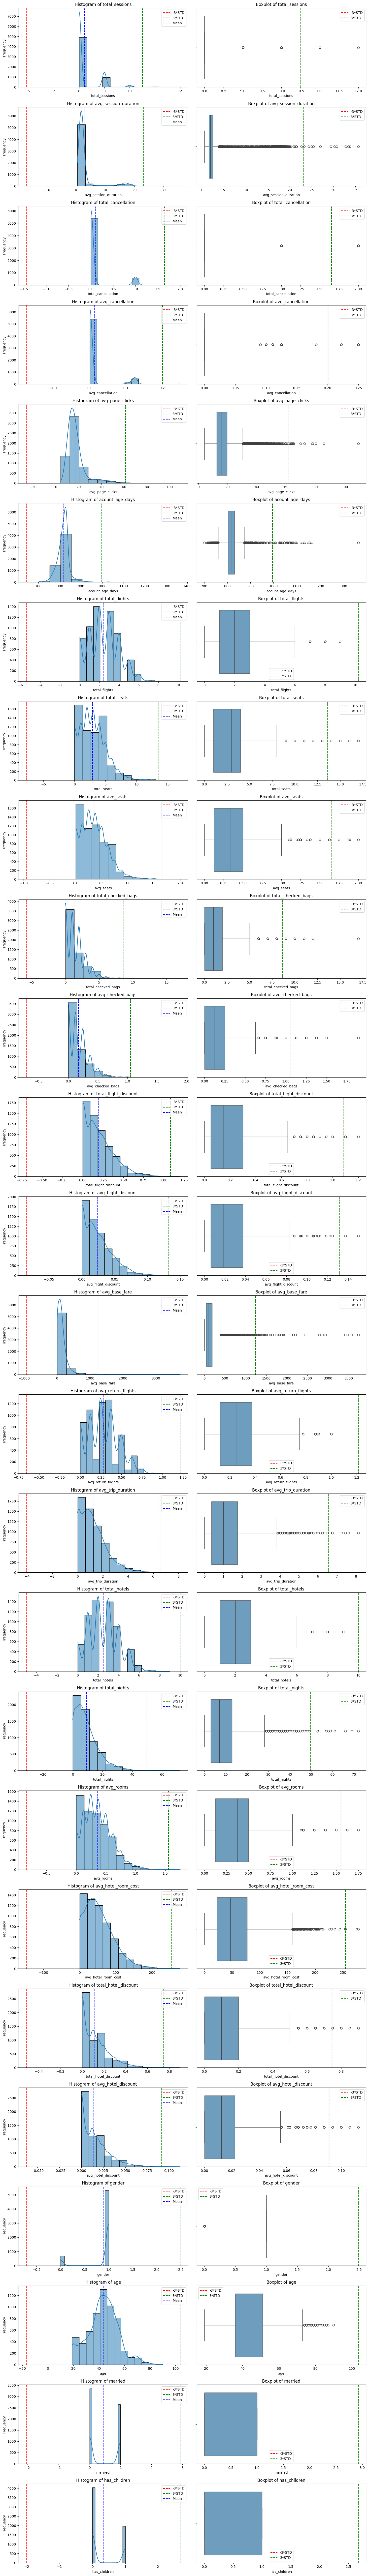

In [16]:
# Select only numerical columns and excluding the user_id column
numerical_columns = final_df.select_dtypes(include=['float64', 'int64', 'int32']).columns
numerical_columns = [col for col in numerical_columns if col != 'user_id']


# Set up the figure and axes
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 4 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    # Compute the outlier bounds: I commented out the lower_bound as in all the columns it's out of the range
    lower_bound = final_df[col].mean() - 5 * final_df[col].std()
    upper_bound = final_df[col].mean() + 5 * final_df[col].std()
    mean = final_df[col].mean()

    # Plot histogram
    bins = int(np.log2(len(final_df[col])) + 1)  # Sturges' formula
    sns.histplot(final_df[col], ax=axes[i, 0], bins=bins, kde=True, edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].axvline(lower_bound, color='r', linestyle='--', label=f'-3*STD')
    axes[i, 0].axvline(upper_bound, color='g', linestyle='--', label=f'3*STD') # Draw the 5*STD line on boxplot
    axes[i, 0].axvline(mean, color='b', linestyle='--', label='Mean')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    # Plot box plot
    sns.boxplot(x=final_df[col], ax=axes[i, 1], showfliers=True, boxprops=dict(alpha=0.7))
    axes[i, 1].axvline(upper_bound, color='r', linestyle='--', label=f'-3*STD')  # Draw the -5*STD line on boxplot
    axes[i, 1].axvline(upper_bound, color='g', linestyle='--', label=f'3*STD')  # Draw the 5*STD line on boxplot
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

A detailed outlier analysis reveals that most behavioral and value-related features are heavily right-skewed and contain significant outliers. These characteristics can distort distance-based clustering results such as K-Means. Therefore, instead of deleting outliers — which may hold valuable user information — log-transformations were applied to normalize distributions and reduce the impact of extreme values.

# Log-Transform Outliers

 Choosing log transformation is often a better strategy than simply removing outliers. Removing outliers may result in significant data loss, especially if you have long-tail distributions or valuable high-value customers. Log transformation keeps all data points while reducing the impact of extreme values.

In [17]:
import numpy as np

numerical_columns = final_df.select_dtypes(include=['float64', 'int64', 'int32']).columns
numerical_columns = [col for col in numerical_columns if col != 'user_id']


def log_transform_outliers(df, columns, std_multiplier=3):



    outlier_counts = {} # Dictionary to store outlier counts for each column

    for col in columns:
        # Calculate bounds for outliers
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - std_multiplier * std
        upper_bound = mean + std_multiplier * std

        # Count outliers before transformation
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = outlier_count

        # Apply log transformation to outliers
        df[col] = np.where(
            (df[col] < lower_bound) | (df[col] > upper_bound),
            np.log1p(np.abs(df[col])),
            df[col]
        )

    # Print outlier information for each column
    for col, count in outlier_counts.items():
        percentage = round(count / len(df) * 100, 2)
        print(f"Column '{col}': {count} ({percentage}%) values were transformed.")

    return df

# Apply log transformation to outliers in the DataFrame
final_df = log_transform_outliers(final_df, numerical_columns)

Column 'total_sessions': 128 (2.13%) values were transformed.
Column 'avg_session_duration': 336 (5.6%) values were transformed.
Column 'total_cancellation': 15 (0.25%) values were transformed.
Column 'avg_cancellation': 15 (0.25%) values were transformed.
Column 'avg_page_clicks': 162 (2.7%) values were transformed.
Column 'acount_age_days': 74 (1.23%) values were transformed.
Column 'total_flights': 5 (0.08%) values were transformed.
Column 'total_seats': 47 (0.78%) values were transformed.
Column 'avg_seats': 45 (0.75%) values were transformed.
Column 'total_checked_bags': 85 (1.42%) values were transformed.
Column 'avg_checked_bags': 72 (1.2%) values were transformed.
Column 'total_flight_discount': 66 (1.1%) values were transformed.
Column 'avg_flight_discount': 59 (0.98%) values were transformed.
Column 'avg_base_fare': 95 (1.58%) values were transformed.
Column 'avg_return_flights': 12 (0.2%) values were transformed.
Column 'avg_trip_duration': 81 (1.35%) values were transformed

# Clustering: PCA + KMeans

In [18]:
X = final_df[numerical_columns]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


pca= PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.27796386 0.18859302 0.13356694 0.0721116  0.06852506 0.04807317
 0.03984382 0.0373663  0.0249807  0.01854249]
0.9095669625390053


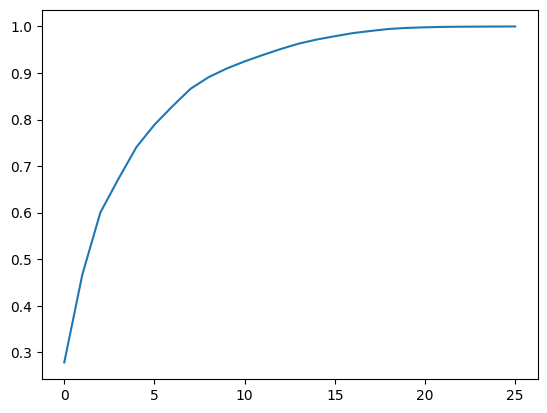

In [19]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.show()

* Choosing Optimal k: Elbow + Silhouette

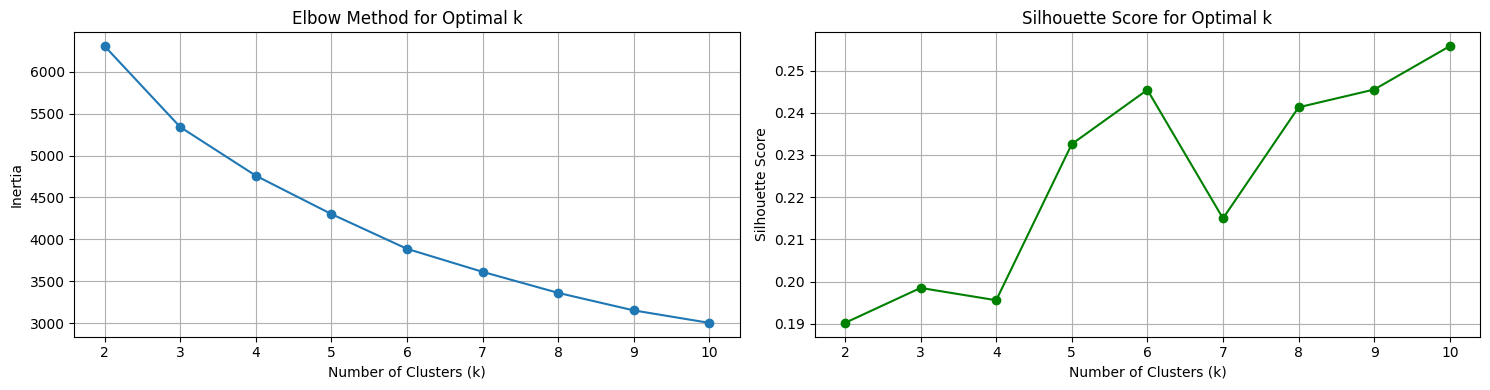

In [20]:
# Define range for k
k_values = range(2, 11)  # Start from 2 clusters

# Store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Loop through k values, calculate inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Elbow Method plot
ax1.plot(k_values, inertia_values, marker='o', linestyle='-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette Score plot
ax2.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='green')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()

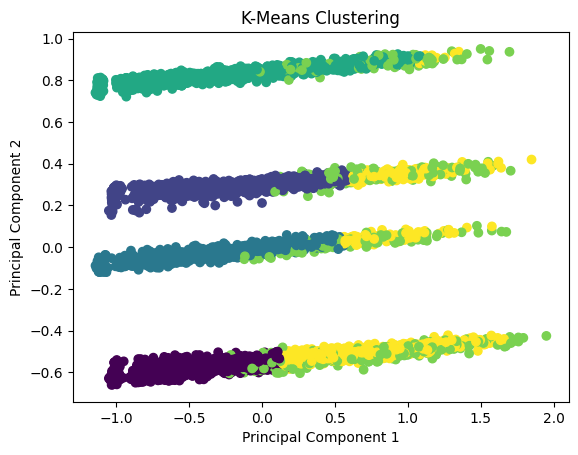

Silhouette Score (k=6): 0.245


In [21]:

optimal_k = 6 # adjust optimal k based on the plots

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_pca)
final_df['cluster_'] = kmeans.labels_

# Visualize clusters (first two principal components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Print Silhouette Score for the optimal k
print(f'Silhouette Score (k={optimal_k}): {silhouette_score(X_pca, kmeans.labels_).round(3)}')

In [22]:
cluster_means_pca = final_df.groupby('cluster_')[numerical_columns].mean().round(3)
cluster_count = final_df['cluster_'].value_counts()
print(cluster_count)

print(cluster_means_pca.T)

cluster_
0    1339
5    1239
1    1183
3     973
2     700
4     564
Name: count, dtype: int64
cluster_                     0        1        2        3        4        5
total_sessions           8.073    8.050    8.042    8.004    7.957    8.063
avg_session_duration     1.752    1.839    1.887    1.866    5.659    2.316
total_cancellation       0.009    0.005    0.011    0.005    1.003    0.000
avg_cancellation         0.001    0.001    0.001    0.001    0.124    0.000
avg_page_clicks         13.927   14.718   14.652   14.978   24.384   18.606
acount_age_days        807.686  808.873  802.781  805.736  795.512  810.207
total_flights            1.331    1.891    1.726    2.049    3.661    4.039
total_seats              1.504    2.173    1.976    2.459    4.550    4.838
avg_seats                0.184    0.265    0.242    0.300    0.588    0.596
total_checked_bags       0.651    1.037    0.933    1.229    2.174    2.294
avg_checked_bags         0.080    0.127    0.115    0.154    0.297   

* Silhouette Score is low and this indicates poor cluster separation.I will try to add important features and check the correlation.

#  Additional Feature Engineering

I will try to improve the segmentation results by generating new futures.

In [23]:

final_df['hotel_booked_ratio'] = final_df['total_hotels'] / final_df['total_sessions'].fillna(0)
final_df['flight_booked_ratio'] = final_df['total_flights'] / final_df['total_sessions'].fillna(0)




final_df['avg_nights_per_trip']= final_df['total_nights'] / (final_df['total_hotels'] + 1e-5)

final_df['total_trips'] = final_df['total_flights'] + final_df['total_hotels']
final_df['trip_per_month'] = final_df['total_trips'] / (final_df['acount_age_days'] / 30)
final_df['cancellation_ratio'] = final_df['total_cancellation'] / (final_df['total_sessions']+ 1e-5)

final_df['trip_frequency'] = final_df['total_trips'] / final_df['acount_age_days']


final_df['avg_spent_per_trip'] = final_df['avg_base_fare'] + final_df['avg_hotel_room_cost']
final_df['avg_dolars_saved']= final_df['avg_base_fare']*final_df['avg_flight_discount'] + final_df['avg_hotel_room_cost']*final_df['avg_hotel_discount']
final_df['total_spent'] = final_df['avg_base_fare']*final_df['total_flights'] + final_df['avg_hotel_room_cost']*final_df['total_hotels']
final_df['value_per_day'] = final_df['avg_spent_per_trip'] / (final_df['avg_trip_duration'] + 1)


final_df['engagement'] = final_df['avg_page_clicks'] * final_df['avg_session_duration']
final_df['booking_conversion'] = (final_df['total_flights'] + final_df['total_hotels']) / (final_df['total_sessions'] + 1e-5)


final_df['avg_seats_per_flight'] = final_df['total_seats'] / (final_df['total_flights'] + 1e-5)
final_df['baggage_in_flight'] = final_df['total_checked_bags'] / (final_df['total_flights'] + 1e-5)

final_df['combo_trip_ratio'] = ((final_df['total_flights'] > 0) & (final_df['total_hotels'] > 0)).astype(int)


final_df['booking_conversion'] = (final_df['total_flights'] + final_df['total_hotels']) / (final_df['total_sessions'] + 1e-5)

In [24]:
selected_features = [
    'age',
    'married',
    'has_children',
    'trip_per_month',


    'hotel_booked_ratio',
    'flight_booked_ratio',
    'trip_frequency',
    'total_trips',
    'cancellation_ratio',
    'engagement',
    'booking_conversion',


    'avg_seats_per_flight',
    'avg_nights_per_trip',
    'avg_return_flights',
    'baggage_in_flight',

    'combo_trip_ratio',
    'avg_dolars_saved',
    'value_per_day',
    'avg_spent_per_trip',
    'total_spent',

    'avg_session_duration',
    'avg_page_clicks',
    'avg_cancellation',
    'acount_age_days',
    'total_sessions',
    'avg_trip_duration',

]

In [25]:
X2 = final_df[selected_features]
scaler = MinMaxScaler()
X_scaled2 = scaler.fit_transform(X2)


pca= PCA(n_components=8)
X_pca2 = pca.fit_transform(X_scaled2)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.27666846 0.26388435 0.19327629 0.06630866 0.04517594 0.02579159
 0.0211669  0.01934101]
0.9116131943244812


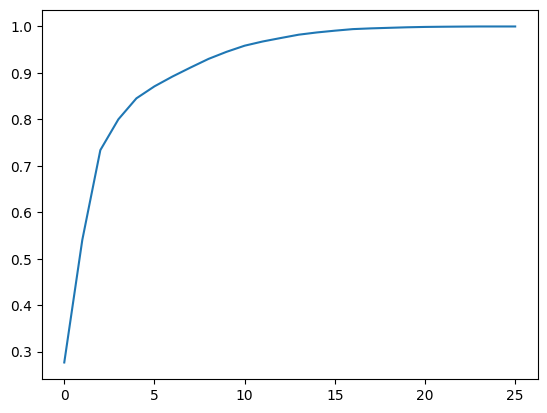

In [26]:
pca_full = PCA()
X_pca_full2 = pca_full.fit_transform(X_scaled2)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.show()

* Choosing Optimal k: Elbow + Silhouette

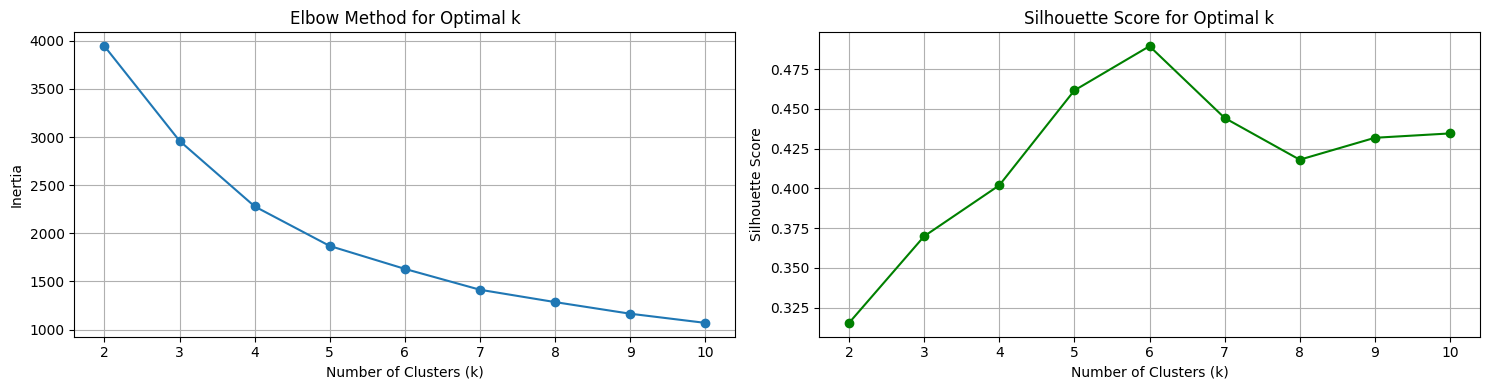

In [27]:
# Define range for k
k_values = range(2, 11)  # Start from 2 clusters

# Store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Loop through k values, calculate inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca2)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca2, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Elbow Method plot
ax1.plot(k_values, inertia_values, marker='o', linestyle='-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette Score plot
ax2.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='green')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()




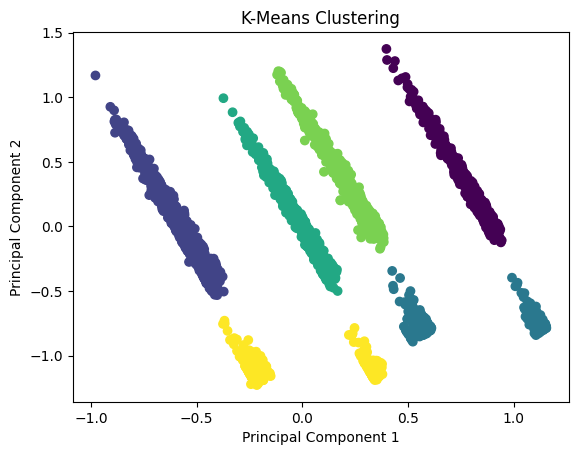

Silhouette Score: 0.4894611177835746


In [28]:

optimal_k = 6 # adjust optimal k based on the plots

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_pca2)
final_df['cluster2'] = kmeans.labels_

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()




score = silhouette_score(X_pca2, kmeans.labels_)
print(f"Silhouette Score: {score}")

In [29]:
cluster_means_pca = final_df.groupby('cluster2')[selected_features].mean().round(3)
cluster_count = final_df['cluster2'].value_counts()
print(cluster_count)

print(cluster_means_pca.T)

cluster2
1    2105
4    1344
0     939
3     714
5     537
2     359
Name: count, dtype: int64
cluster2                    0        1        2        3        4        5
age                    47.873   40.065   53.487   39.889   48.299   30.347
married                 1.000    0.000    1.000    0.000    1.000    0.000
has_children            1.000    0.000    0.404    1.000    0.000    0.298
trip_per_month          0.429    0.500    0.069    0.591    0.454    0.030
hotel_booked_ratio      0.352    0.376    0.065    0.340    0.370    0.063
flight_booked_ratio     0.339    0.378    0.016    0.335    0.364    0.013
trip_frequency          0.014    0.017    0.002    0.020    0.015    0.001
total_trips             5.213    5.807    0.599    5.304    5.690    0.600
cancellation_ratio      0.015    0.016    0.000    0.017    0.014    0.000
engagement             47.779   47.961   19.286   52.024   46.222   20.482
booking_conversion      0.691    0.754    0.081    0.675    0.734    0.076
avg_s

#  Correlation Analysis

I will check the futures with high correlation and drop them to improve the model results

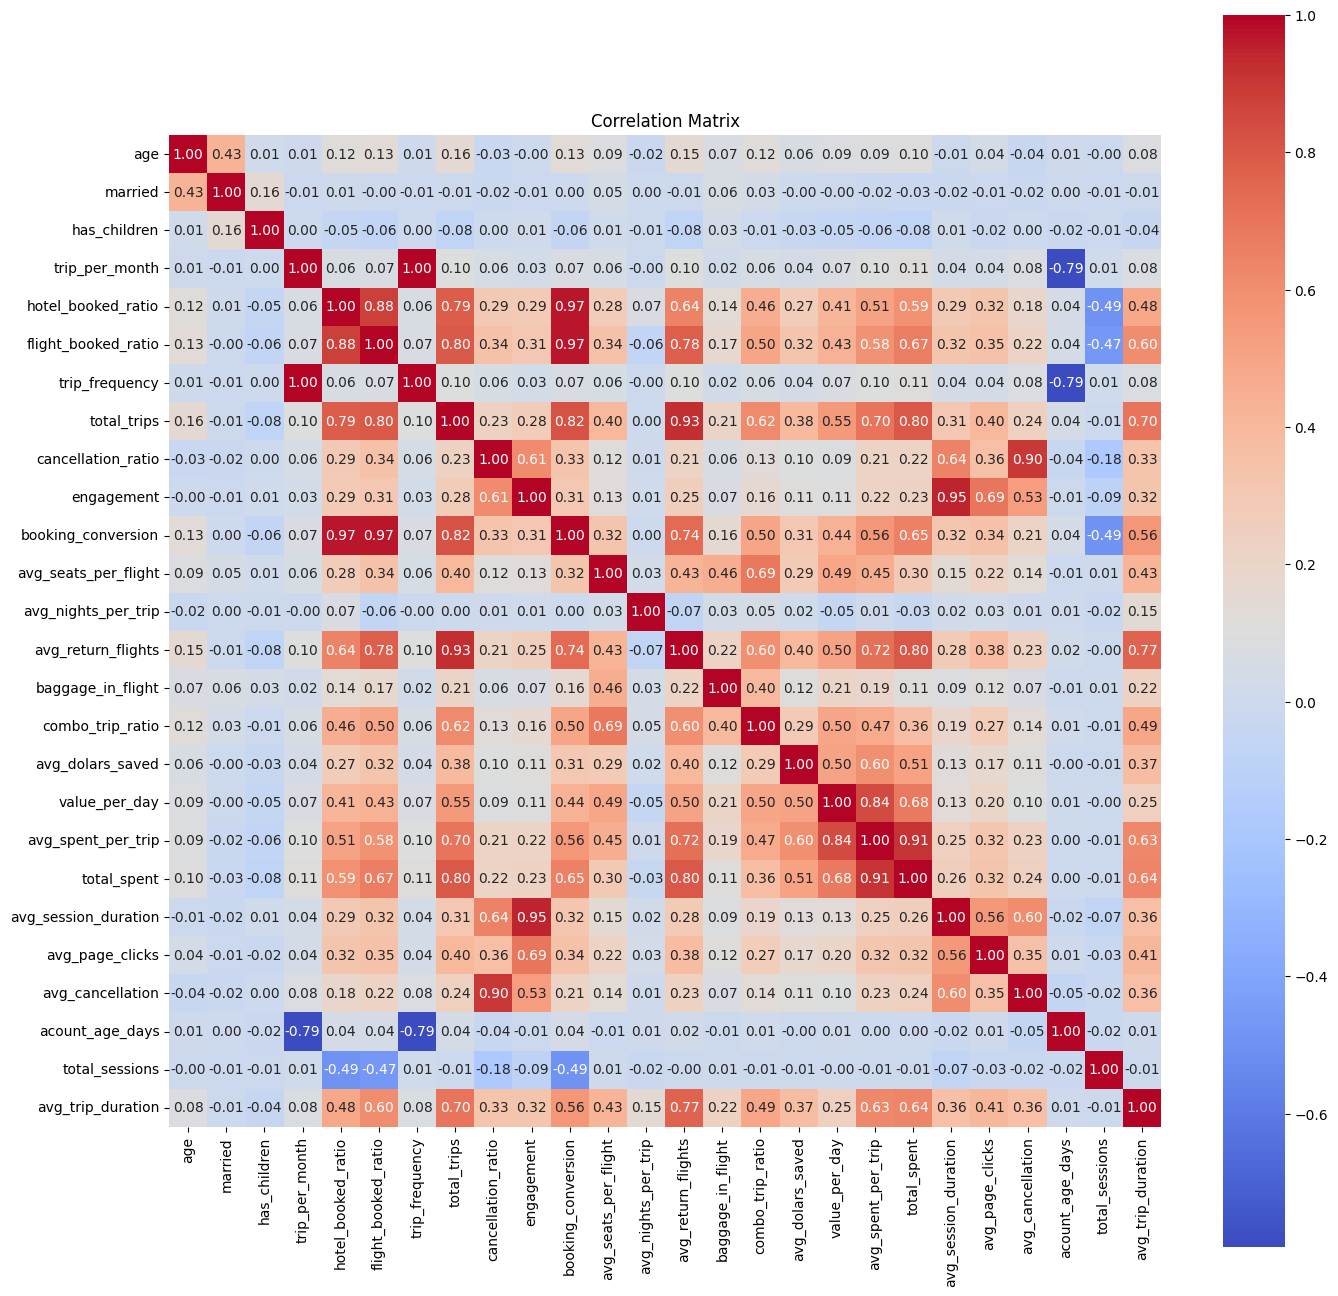

['trip_frequency', 'booking_conversion', 'avg_return_flights', 'total_spent', 'avg_session_duration']


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


corr_matrix = final_df[selected_features].corr()


plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


threshold = 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

print(to_drop)


# Final Clustering: PCA + KMeans

In [31]:
X3 = final_df[selected_features].drop(columns=['trip_frequency', 'booking_conversion', 'avg_return_flights', 'total_spent', 'avg_session_duration'])
scaler = MinMaxScaler()
X_scaled3 = scaler.fit_transform(X3)


pca= PCA(n_components=8)
X_pca3 = pca.fit_transform(X_scaled3)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3049429  0.23419522 0.20997586 0.06323137 0.03698787 0.02604623
 0.02305557 0.02138967]
0.9198247003722997


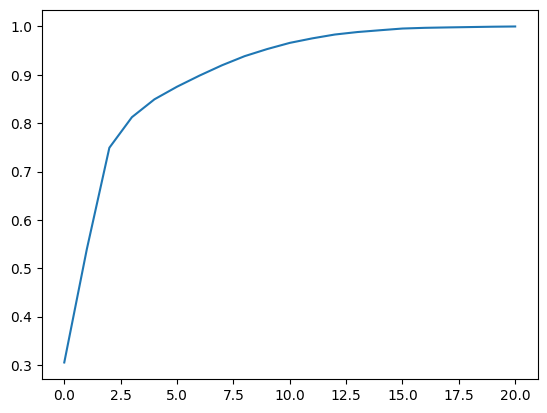

In [32]:
pca_full = PCA()
X_pca_full3 = pca_full.fit_transform(X_scaled3)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.show()

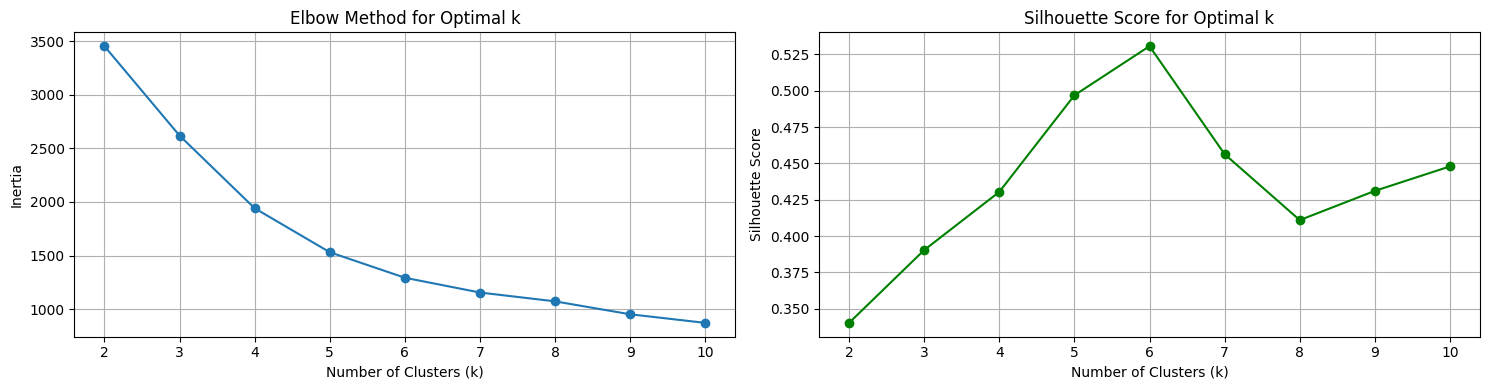

In [33]:
# Define range for k
k_values = range(2, 11)  # Start from 2 clusters

# Store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Loop through k values, calculate inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca3)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca3, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Elbow Method plot
ax1.plot(k_values, inertia_values, marker='o', linestyle='-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette Score plot
ax2.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='green')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()


* Applied KMeans clustering with 6 clusters.

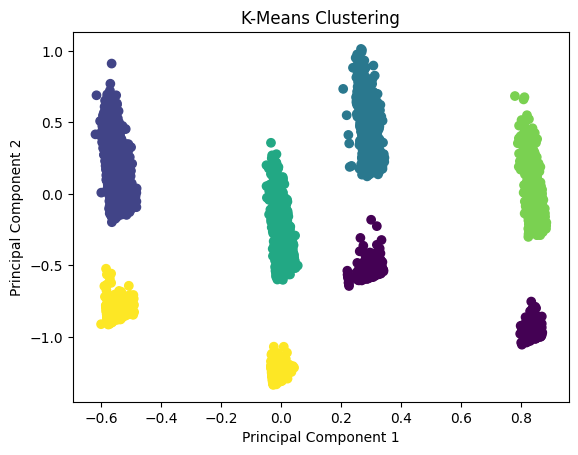

Silhouette Score: 0.5305861268994159


In [34]:

optimal_k = 6 # adjust optimal k based on the plots

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_pca3)
final_df['cluster3'] = kmeans.labels_

plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()




score = silhouette_score(X_pca3, kmeans.labels_)
print(f"Silhouette Score: {score}")

* Evaluated with a Silhouette Score of 0.53, indicating good separation between user groups!

In [35]:
cluster_means_pca3 = final_df.groupby('cluster3')[selected_features].mean().round(3)
cluster_count = final_df['cluster3'].value_counts()
print(cluster_count)

print(cluster_means_pca3.T)

cluster3
1    2105
2    1344
4     939
3     714
5     537
0     359
Name: count, dtype: int64
cluster3                    0        1        2        3        4        5
age                    53.487   40.065   48.299   39.889   47.873   30.347
married                 1.000    0.000    1.000    0.000    1.000    0.000
has_children            0.404    0.000    0.000    1.000    1.000    0.298
trip_per_month          0.069    0.500    0.454    0.591    0.429    0.030
hotel_booked_ratio      0.065    0.376    0.370    0.340    0.352    0.063
flight_booked_ratio     0.016    0.378    0.364    0.335    0.339    0.013
trip_frequency          0.002    0.017    0.015    0.020    0.014    0.001
total_trips             0.599    5.807    5.690    5.304    5.213    0.600
cancellation_ratio      0.000    0.016    0.014    0.017    0.015    0.000
engagement             19.286   47.961   46.222   52.024   47.779   20.482
booking_conversion      0.081    0.754    0.734    0.675    0.691    0.076
avg_s

# **Cluster Profiling and Perk Recommendations**

* Based on the results of the clustering analysis, we can interpret the characteristics of each cluster and identify the dominant


👤**Cluster 0: Seniors** :  
- Oldest users (avg age: 53)  
- All are married, some have children  
- Extremely low activity and spending  
- Very low booking rates, almost no trips  
- Low engagement, short sessions  

 **Recommended Perk:**  
➡️ *Free Baggage*
To reduce travel stress and encourage occasional trips. Free baggage is especially helpful for less tech-savvy or older users who value comfort and convenience over deals or rewards.

---

👤 **Cluster 1: Young Singles** :  
- Youngest users (avg age: 40)
- Not married, no children
- High travel frequency and strong engagement
- Highest booking conversion and value per day
- Likely spontaneous, price-conscious travelers

 **Recommended Perk:**  
➡️ *Free Meals at Hotel*
This emotional and low-cost perk adds value without increasing complexity. It may help convert young explorers who hesitate to book due to budget constraints.

---

👤 **Cluster 2: Business Travelers** :

- Middle-aged, mostly married
- No children
- High trip frequency and conversion rates  
- Very engaged: long sessions, high clicks  
- Book both flights and hotels regularly  
- Spend and save the most overall  

 **Recommended Perk:**
 ➡️ *No Cancellation Fees*
Flexibility is key for this segment. Adds flexibility to their fast-paced schedule and reduces risk for last-minute changes. Removing cancellation penalties builds trust and increases bookings.


---

👤 **Cluster 3: Normal Travelers**:
  
- Mid-aged, unmarried with children
- Medium trip frequency, moderate spending and value
- Balanced booking behavior: both hotels and flights
- Average engagement — use the platform actively but not intensively
- Represent the platform’s “typical” customer segment

 **Recommended Perk:**  
➡️ *Exclusive Discounts*
Appeals to price-conscious travelers who consistently book both hotels and flights. Tailored discounts signal appreciation and help retain these high-value users.

---

👤 **Cluster 4: Family Travelers**:

- Married users with children (average age ~48)
- High number of booked seats and baggage per trip
- Book both flights and hotels frequently — high combo ratio
- Active on the platform and engage regularly
- Spend more than average and travel together

 **Recommended Perk:**  
➡️ *Free Checked Baggage*
This perk directly reduces cost and friction for family trips. It appeals to budget-conscious parents booking for multiple travelers at once.

---

👤 **Cluster 5: Dreamers**:

- Younger adults (~30), unmarried, no children
- Browse heavily, long sessions, many clicks — but don’t book
- Extremely low trip frequency and spending
- Possibly curious or planning ahead but not ready to purchase

 **Recommended Perk:**  
➡️ *Free Hotel Night with Flight Booking*
This high-impact perk encourages booking among aspirational travelers. It may help turn “dreamers” into buyers by lowering the psychological barrier to action.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Cluster names for presentation
cluster_names = {
    0: "Seniors",
    1: "Young Singles",
    2: "Business Travelers",
    3: "Normal Travelers",
    4: "Family Travelers",
    5: "Dreamers"
}

# Recommended perks for each cluster
perk_mapping = {
    0: "Free Baggage",
    1: "Free Meals at Hotel",
    2: "No Cancellation Fee",
    3: "Exclusive Discounts",
    4: "Free Baggage",
    5: "Free Hotel Night with Flight Booking"
}

# Calculate average values for selected features by cluster
cluster_means_pca3 = final_df.groupby('cluster3')[selected_features].mean().round(3)

# Add user count for each cluster
cluster_means_pca3['count'] = final_df['cluster3'].value_counts().sort_index()

# Map cluster names
cluster_means_pca3['cluster_name'] = cluster_means_pca3.index.map(cluster_names)

# Map recommended perks
cluster_means_pca3['recommended_perk'] = cluster_means_pca3.index.map(perk_mapping)

# Reorder columns for better readability
ordered_columns = ['cluster_name', 'count', 'recommended_perk'] + \
    [col for col in cluster_means_pca3.columns if col not in ['cluster_name', 'count', 'recommended_perk']]
cluster_profiles = cluster_means_pca3[ordered_columns]

# Show the final cluster profile table
display(cluster_profiles)

,cluster_name,count,recommended_perk,age,married,has_children,trip_per_month,hotel_booked_ratio,flight_booked_ratio,trip_frequency,...,avg_dolars_saved,value_per_day,avg_spent_per_trip,total_spent,avg_session_duration,avg_page_clicks,avg_cancellation,acount_age_days,total_sessions,avg_trip_duration
cluster3,,,,,,,,,,,,,,,,,,,,,
0,Seniors,359,Free Baggage,53.487,1.0,0.404,0.069,0.065,0.016,0.002,...,0.317,16.879,21.068,25.973,1.466,11.792,0.000,798.531,8.009,0.061
1,Young Singles,2105,Free Meals at Hotel,40.065,0.0,0.000,0.500,0.376,0.378,0.017,...,4.437,91.003,219.677,761.243,2.430,17.272,0.015,807.613,8.037,1.413
2,Business Travelers,1344,No Cancellation Fee,48.299,1.0,0.000,0.454,0.370,0.364,0.015,...,4.313,89.235,213.694,722.269,2.367,16.952,0.013,809.483,8.055,1.394
3,Normal Travelers,714,Exclusive Discounts,39.889,0.0,1.000,0.591,0.340,0.335,0.020,...,4.052,86.425,205.763,656.791,2.590,16.907,0.017,801.285,8.070,1.383
4,Family Travelers,939,Free Baggage,47.873,1.0,1.000,0.429,0.352,0.339,0.014,...,4.045,83.955,189.627,595.145,2.392,16.824,0.013,806.179,7.997,1.294
5,Dreamers,537,Free Hotel Night with Flight Booking,30.347,0.0,0.298,0.030,0.063,0.013,0.001,...,0.315,15.064,18.087,25.233,1.493,12.017,0.000,806.461,8.080,0.067


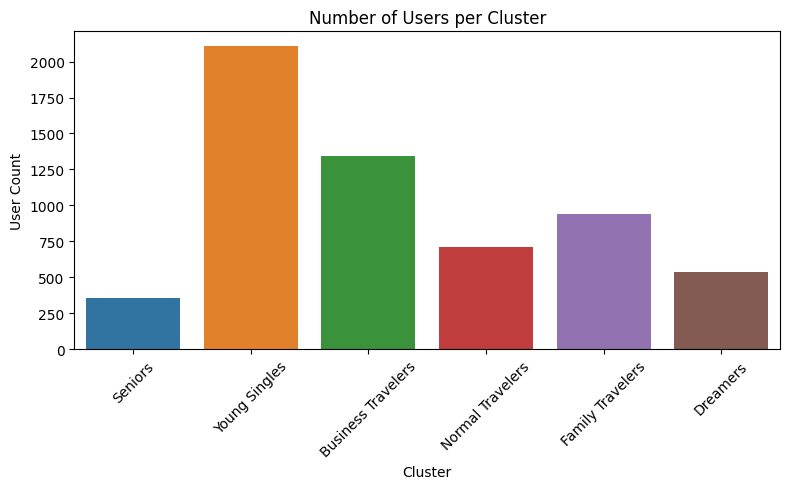

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_profiles['cluster_name'], y=cluster_profiles['count'],hue=cluster_profiles['cluster_name'] ,legend=False)
plt.title('Number of Users per Cluster')
plt.xlabel('Cluster')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()